In [1]:
import os
import PyImbalReg as pir
import pandas as pd
import numpy as np 
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt
import resreg

In [2]:
df = pd.read_csv("/home/usr/Documents/reg-class-fault-detection/dataset/kpi_fuller_df.csv")

In [3]:
def label_func(faultD):
  if(faultD == 0): return 0
  elif(faultD < 500): return 1
  else: return 2

In [4]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def reg_acc(md, data, test_labels):
  test_predictions = md.predict(data).flatten()
  r2 = r2_score(test_labels, test_predictions)
  rmse = np.sqrt(mean_squared_error(test_labels, test_predictions))
  mae = mean_absolute_error(test_labels, test_predictions)

  print(f'r2 score: {r2}')
  print(f'rmse score: {rmse}')
  print(f'mae score: {mae}')
  # print(f'erro medio de: {rmse} segundos')

  plt.scatter(test_labels, test_predictions)
  plt.xlabel('True Values')
  plt.ylabel('Predictions')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0,plt.xlim()[1]])
  plt.ylim([0,plt.ylim()[1]])
  _ = plt.plot([-100, 100], [-100, 100])

In [5]:
def bin_func(faultD):
  if(faultD == 0): return 0
  else: return (faultD//500 + 1)

In [6]:
df = df.sample(frac=1)
test_data = df[:(len(df)//5)]
train_data = df[(len(df)//5):]

test_data['bin'] = test_data.fault_duration.apply(bin_func)
test_data['fault'] = test_data['fault_duration'].apply(label_func)
test_data['is_fault'] = test_data.fault.apply(lambda x: 0 if x == 0 else 1)

X_test = test_data.drop(columns=['Unnamed: 0','NE ID','endTime', 'relation','fault_duration','bin','fault','is_fault']).values
y_test_fd = test_data.fault_duration.values
y_test = test_data.fault_duration.apply(label_func).values

train_data['fault'] = train_data['fault_duration'].apply(label_func)
train_data = train_data.dropna()
train_data = train_data.drop(columns=['Unnamed: 0','NE ID','endTime','relation'])
train_data['bin'] = train_data.fault_duration.apply(bin_func)
train_data['is_fault'] = train_data.fault.apply(lambda x: 0 if x == 0 else 1)

/tmp/ipykernel_7171/150606986.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['bin'] = test_data.fault_duration.apply(bin_func)
/tmp/ipykernel_7171/150606986.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['fault'] = test_data['fault_duration'].apply(label_func)
/tmp/ipykernel_7171/150606986.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [7]:
y = train_data.is_fault.values
X = train_data.drop(columns=['fault','fault_duration','is_fault','bin']).values

faults = train_data[train_data['fault_duration'] > 0]
X_fault = faults.drop(columns=['fault','fault_duration']).values
y_fault = faults.is_fault.values


In [8]:
from collections import Counter
from imblearn.under_sampling import EditedNearestNeighbours


enn = EditedNearestNeighbours()
X_res, y_res = enn.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 552271, 1: 31866})


In [14]:
edited_df = pd.DataFrame()
edited_df[train_data.drop(columns=['fault','fault_duration','is_fault','bin']).columns] = X_res
edited_df['label'] = y_res

In [12]:
train_data.fault.value_counts()

fault
0    625437
2     30612
1      1254
Name: count, dtype: int64

In [15]:
edited_df.label.value_counts()

label
0    552271
1     31866
Name: count, dtype: int64

In [22]:
train_data = train_data.reset_index()
train_data = train_data.drop(columns='index')

In [35]:
resampled_data

,access_success_rate,resource_utilition_rate,TA,bler,cqi,mcs,data_rate,access_success_rate_rol_mean,access_success_rate_rol_std,access_success_rate_rol_diff,...,mcs_rol_skew,data_rate_rol_mean,data_rate_rol_std,data_rate_rol_diff,data_rate_rol_kurt,data_rate_rol_skew,fault_duration,fault,bin,is_fault
0,1.000000,0.040457,0.234593,0.166710,0.352582,0.187989,0.012974,0.999277,0.001968,0.500000,...,0.643877,0.028103,0.005154,0.546616,0.884821,0.572190,0.0,0,0.0,0
2,0.995556,0.079433,0.360904,0.096838,0.616076,0.339405,0.024617,0.989840,0.037110,0.497778,...,0.487132,0.073476,0.011429,0.545510,0.887870,0.958182,0.0,0,0.0,0
3,0.000000,0.008698,0.000000,0.000000,0.000000,0.000000,0.000000,0.795299,0.811739,0.000000,...,0.454847,0.124248,0.097423,0.546215,0.884469,0.365384,0.0,0,0.0,0
4,0.991537,0.031429,0.995532,0.122160,0.622097,0.201636,0.065308,0.592252,0.987121,0.505870,...,0.518789,0.113537,0.096042,0.555155,0.884990,0.505703,0.0,0,0.0,0
5,0.977778,0.015284,0.098683,0.068679,0.948000,0.259533,0.132977,0.195556,0.798352,0.988889,...,1.000000,0.072464,0.138934,0.622727,0.888111,0.994295,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657163,0.000000,0.007557,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.816497,0.500000,...,0.701391,0.060500,0.115996,0.546215,0.888111,0.994295,3600.0,2,8.0,1
657184,0.996454,0.030588,0.137040,0.082495,0.530410,0.411281,0.022066,0.970305,0.115048,0.498227,...,0.508233,0.199297,0.084503,0.530977,0.885239,0.317963,3600.0,2,8.0,1
657202,0.997126,0.116306,0.208378,0.088527,0.528989,0.319779,0.046569,0.994603,0.004551,0.503207,...,0.378248,0.096581,0.025957,0.561981,0.885622,0.307182,3600.0,2,8.0,1
657204,0.998195,0.161948,0.491995,0.110033,0.356089,0.157550,0.016614,0.995612,0.005925,0.499097,...,0.444529,0.040319,0.010964,0.548486,0.886193,0.713447,3600.0,2,8.0,1


In [36]:
resampled_data = train_data.iloc[enn.sample_indices_]
X_edited = resampled_data.drop(columns=['fault','fault_duration','is_fault','bin'])
y_edited = resampled_data.fault.values

In [29]:
train_data.fault.value_counts()

fault
0    625437
2     30612
1      1254
Name: count, dtype: int64

In [32]:
train_data.iloc[enn.sample_indices_].fault.value_counts()

fault
0    552271
2     30612
1      1254
Name: count, dtype: int64

# OVERSAMPLE + CLASSIFICATION


In [38]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix, f1_score, recall_score

def show_results(y_test, predictions):
  print('Accuracy score:', accuracy_score(y_test, predictions))
  # print('f1 score:', f1_score(y_test, predictions))
  # print('recall score:', recall_score(y_test, predictions))

  font = {'family' : 'serif', 'weight' : 'bold', 'size':18}
  plt.rc('font', **font)
  disp = ConfusionMatrixDisplay(confusion_matrix(y_test, predictions), display_labels=None)
  disp.plot()
  plt.show()

## SMOTE

In [37]:

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(X_edited, y_edited)
print('Resampled dataset shape %s' % Counter(y_smote))

knearest = KNeighborsClassifier(n_neighbors = 5)
knearest = knearest.fit(X_smote, y_smote)
knn_pred = knearest.predict(X_test)
show_results(y_test, knn_pred)

Resampled dataset shape Counter({0: 552271, 2: 552271, 1: 552271})


/home/usr/anaconda3/envs/cnn-env/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy score: 0.6979400578122623


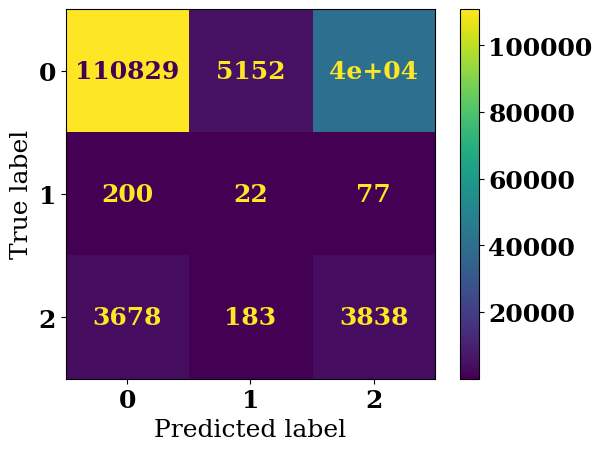

## ADASYN

Resampled dataset shape Counter({2: 557955, 1: 552602, 0: 552271})


/home/usr/anaconda3/envs/cnn-env/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy score: 0.6854343526547999


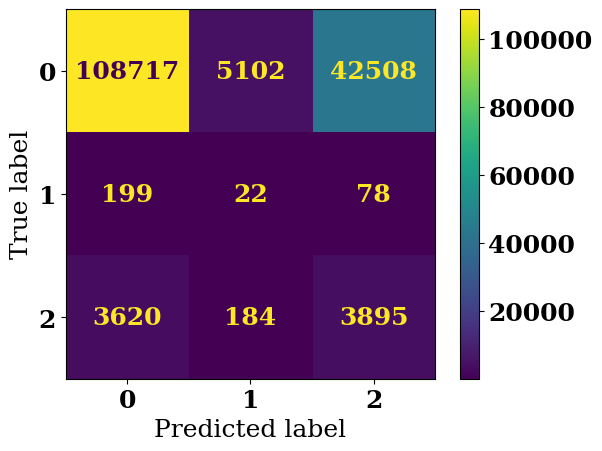

In [40]:
from imblearn.over_sampling import ADASYN


ada = ADASYN(random_state=42)
X_ada, y_ada = ada.fit_resample(X_edited, y_edited)
print('Resampled dataset shape %s' % Counter(y_ada))

knearest_ada = KNeighborsClassifier(n_neighbors = 5)
knearest_ada = knearest_ada.fit(X_ada, y_ada)
knn_pred_ada = knearest_ada.predict(X_test)
show_results(y_test, knn_pred_ada)